<a href="https://colab.research.google.com/github/IDCE-MSGIS/lab-4-zoning-maps-pandas-sophspilio/blob/main/30274_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas 
!apt-get install -y libspatialindex-dev
!pip install rtree 

import pandas as pd 
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
from shapely import wkt 
import rtree 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [ ]:
#connect colab and google drive 
from google.colab import drive 
drive.mount('/content/gdrive') 
root_path = 'gdrive/My Drive/gis/' # set root path

Mounted at /content/gdrive


In [ ]:
#import data files from drive folder 
puds = gpd.read_file(root_path+'input/Planned_Unit_Development__PUDs_.shp', crs = {'init' :'epsg:4326'})
aff = pd.read_csv(root_path+'input/Affordable_Housing.csv')
crosswalk = pd.read_csv(root_path+'input/zoning_crosswalk.csv')

In [ ]:
#exploring the data using .info() and .sample()
puds.sample(4)
aff.info()

In [ ]:
#create geometry column in affordable housing dataframe 
aff['geometry'] = aff.apply(lambda row: Point(row.X, row.Y),axis = 1)
aff = gpd.GeoDataFrame(aff,crs= {'init': 'epsg:4326'})
aff.sample() #note new geometry field with point data 

In [ ]:
#merge datasets to see which PUDs include affordable housing 
puds_aff = gpd.sjoin(puds,aff,op= 'intersects',how = 'left')
puds_aff.info() # to see results of the merge

In [ ]:
puds_info = puds_aff.merge(crosswalk[['Zone_Cat']], how = 'left', left_on = 'PUD_ZONING', right_on = crosswalk['Zone'])
print(f"Total count of PUDs: {puds_info.shape[0]}")
print(f"Count PUDs offering Affordable Housing: {puds_info.loc[~puds_info.PROJECT_NAME.isna()].shape[0]}")

Total count of PUDs: 305
Count PUDs offering Affordable Housing: 78


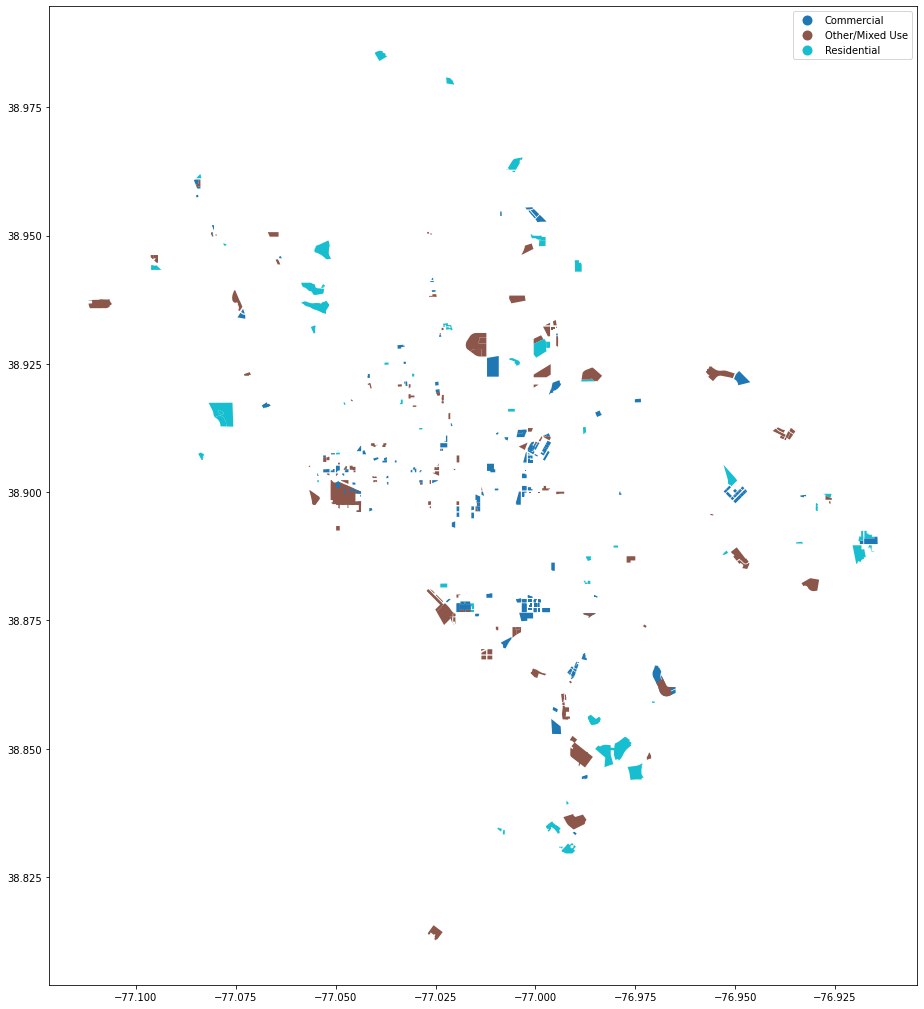

In [ ]:
#plot PUDs by Zoning Cateogry 
puds_info.plot(column = 'Zone_Cat', legend = True, figsize = (16,18))

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:573: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


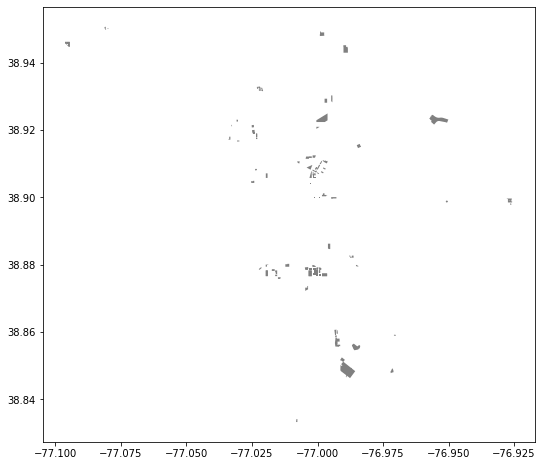

In [ ]:
puds_info[puds_info['TOTAL_AFFORDABLE_UNITS']>0].plot(column = 'TOTAL_AFFORDABLE_UNITS',color = 'grey', figsize = (16,8))

In [ ]:
#export geodataframe as .shp within colab 
puds_info.to_file('puds_info.shp')
#copy .shp from  colab to google drive 
!cp puds_info.cpg 'gdrive/My Drive/gis/output'
!cp puds_info.dbf 'gdrive/My Drive/gis/output'
!cp puds_info.prj 'gdrive/My Drive/gis/output'
!cp puds_info.shp 'gdrive/My Drive/gis/output'
!cp puds_info.shx 'gdrive/My Drive/gis/output'